In [25]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [29]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [30]:
minmaxscaler = MinMaxScaler()

In [31]:
#insert your directory between ''
#example: dataset_root_folder = 'C:/Users/HOME/OneDrive/Desktop/project'
dataset_root_folder = 'E:/folder/project'

In [32]:
dataset_name = "ss_dataset"

In [33]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

E:/folder/project\ss_dataset\Tile 1\masks
E:/folder/project\ss_dataset\Tile 2\masks
E:/folder/project\ss_dataset\Tile 3\masks
E:/folder/project\ss_dataset\Tile 4\masks
E:/folder/project\ss_dataset\Tile 5\masks
E:/folder/project\ss_dataset\Tile 6\masks
E:/folder/project\ss_dataset\Tile 7\masks
E:/folder/project\ss_dataset\Tile 8\masks


In [34]:
image_patch_size = 256

In [35]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [36]:
image.shape

(544, 509, 3)

In [37]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [38]:
len(image_patches)

2

In [39]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [40]:
minmaxscaler = MinMaxScaler()

In [41]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [42]:
image_y[0].shape

(256, 256, 3)

In [43]:
print(type(image))

<class 'numpy.ndarray'>


In [44]:
type(Image.fromarray(image))

PIL.Image.Image

In [45]:
image.shape

(544, 509, 3)

In [46]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [47]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [48]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [49]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [50]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [51]:
type(image_dataset[0])

numpy.ndarray

In [52]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


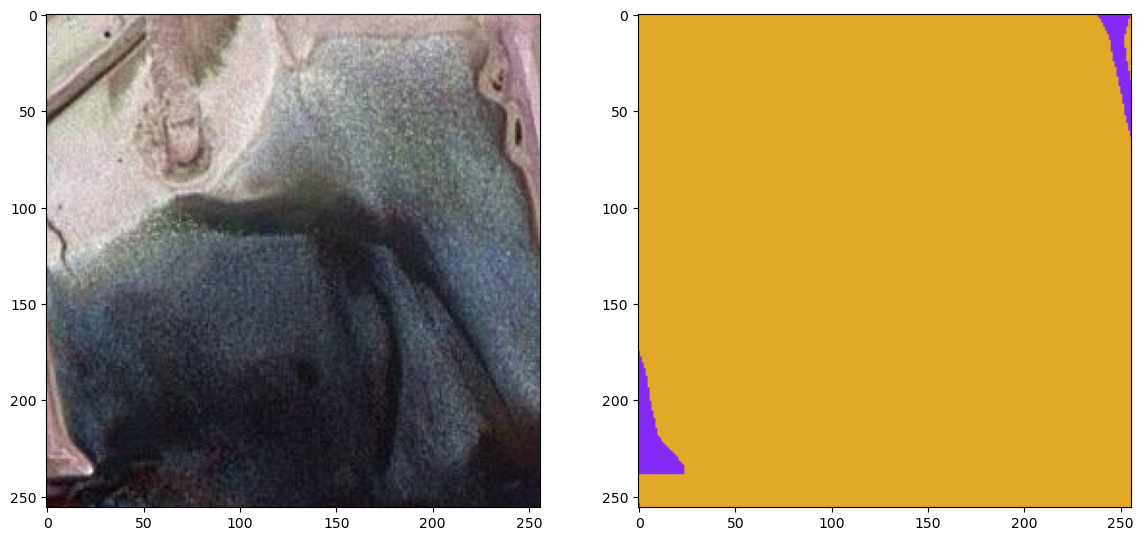

In [53]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [54]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [55]:
mask_dataset.shape[0]

945

In [56]:
label = individual_patched_mask

In [57]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [58]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [59]:
print(len(labels))

945


In [60]:
labels = np.array(labels)

In [61]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [62]:
labels = np.expand_dims(labels, axis=3)

In [63]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [64]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [65]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


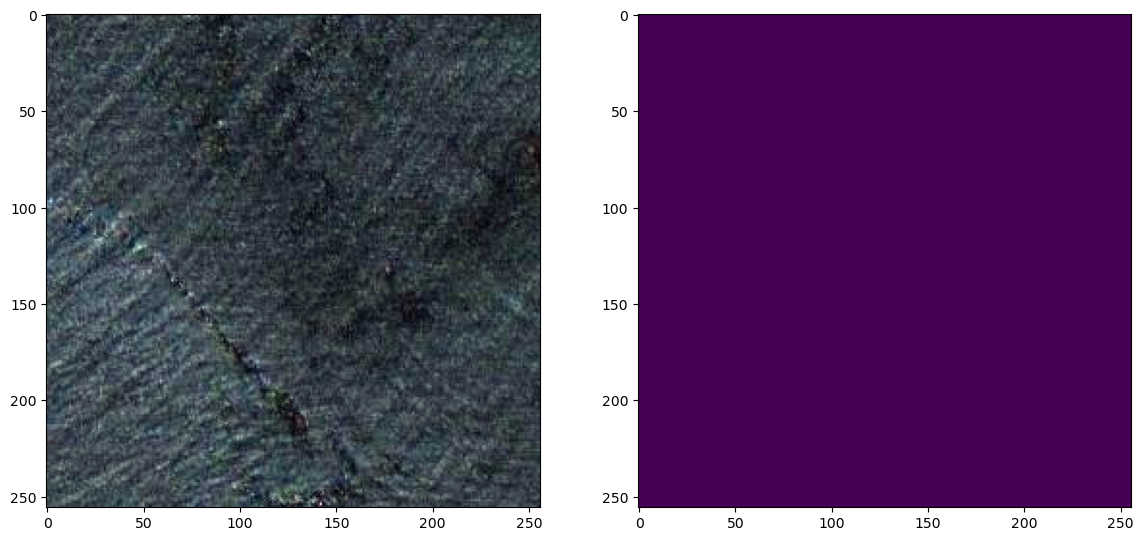

In [66]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [67]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [68]:
total_classes = len(np.unique(labels))

In [69]:
total_classes

6

In [70]:
pip install tensorflow --user

Note: you may need to restart the kernel to use updated packages.


In [71]:
pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [72]:
from tensorflow.keras.utils import to_categorical

In [73]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [74]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [75]:
master_trianing_dataset = image_dataset

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [79]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [80]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


PART 2

In [81]:
pip install -U segmentation-models

In [82]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [83]:
from keras import backend as K

In [84]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [85]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [86]:
metrics = ["accuracy", jaccard_coef]

In [87]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [88]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [89]:
model = get_deep_learning_model()

In [90]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

## Generating Loss Function

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [91]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [92]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [93]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [94]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [95]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [96]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [97]:
import tensorflow as tf

In [98]:
tf.keras.backend.clear_session()


In [99]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [100]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [101]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the file path to save the model
checkpoint_path = "model_checkpoint.h5"

# Create a ModelCheckpoint callback to save the model weights during training
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                     save_weights_only=False,
                                     save_freq='epoch',  # Save every epoch
                                     verbose=1)

# Train your model using fit method and include the checkpoint callback
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=30,
                          validation_data=(X_test, y_test),
                          shuffle=False,
                          callbacks=[checkpoint_callback])

Epoch 1/30


51/51 [==============================] - ETA: 0s - loss: 0.9998 - accuracy: 0.5502 - jaccard_coef: 0.2687
Epoch 1: saving model to model_checkpoint.h5


C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


51/51 [==============================] - 206s 4s/step - loss: 0.9998 - accuracy: 0.5502 - jaccard_coef: 0.2687 - val_loss: 0.9843 - val_accuracy: 0.6568 - val_jaccard_coef: 0.3084
Epoch 2/30
51/51 [==============================] - ETA: 0s - loss: 0.9745 - accuracy: 0.6837 - jaccard_coef: 0.3912
Epoch 2: saving model to model_checkpoint.h5
51/51 [==============================] - 190s 4s/step - loss: 0.9745 - accuracy: 0.6837 - jaccard_coef: 0.3912 - val_loss: 0.9758 - val_accuracy: 0.6598 - val_jaccard_coef: 0.3347
Epoch 3/30
51/51 [==============================] - ETA: 0s - loss: 0.9698 - accuracy: 0.6897 - jaccard_coef: 0.4108
Epoch 3: saving model to model_checkpoint.h5
51/51 [==============================] - 188s 4s/step - loss: 0.9698 - accuracy: 0.6897 - jaccard_coef: 0.4108 - val_loss: 0.9760 - val_accuracy: 0.6424 - val_jaccard_coef: 0.3316
Epoch 4/30
51/51 [==============================] - ETA: 0s - loss: 0.9639 - accuracy: 0.7036 - jaccard_coef: 0.4413
Epoch 4: saving mod

In [102]:
# model_history = model.fit(X_train, y_train,
#                           batch_size=16,
#                           verbose=1,
#                           epochs=30,
#                           validation_data=(X_test, y_test),
#                           shuffle=False)

In [103]:
history_a = model_history

In [104]:
history_a.history

{'loss': [0.9998353123664856,
  0.9744971990585327,
  0.9697835445404053,
  0.9639313220977783,
  0.954513430595398,
  0.949640691280365,
  0.9461205005645752,
  0.9413184523582458,
  0.9370238780975342,
  0.9348613023757935,
  0.9308914542198181,
  0.9292795658111572,
  0.9284049272537231,
  0.9260386824607849,
  0.9252883195877075,
  0.9231794476509094,
  0.9228297472000122,
  0.9204604029655457,
  0.919122576713562,
  0.918906569480896,
  0.9169113039970398,
  0.9153019189834595,
  0.916448712348938,
  0.9181568026542664,
  0.9131498336791992,
  0.9123942852020264,
  0.9120654463768005,
  0.9099902510643005,
  0.9080296158790588,
  0.9083945155143738],
 'accuracy': [0.5501731038093567,
  0.6836975812911987,
  0.6896985769271851,
  0.7036154270172119,
  0.7408375144004822,
  0.7555274367332458,
  0.768812894821167,
  0.7793818712234497,
  0.7911695241928101,
  0.7947009205818176,
  0.8074716329574585,
  0.8109903335571289,
  0.8124914765357971,
  0.8197404742240906,
  0.8203502297401

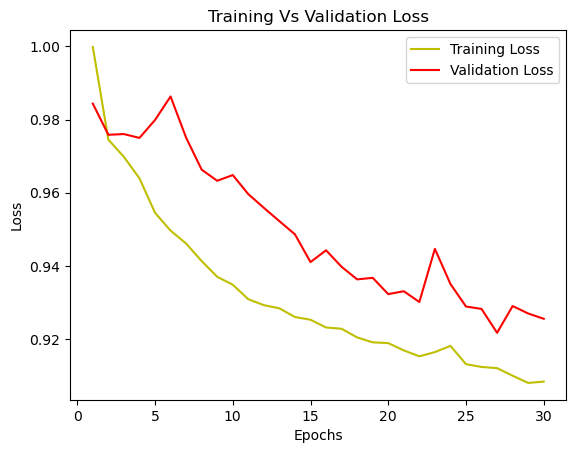

In [105]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

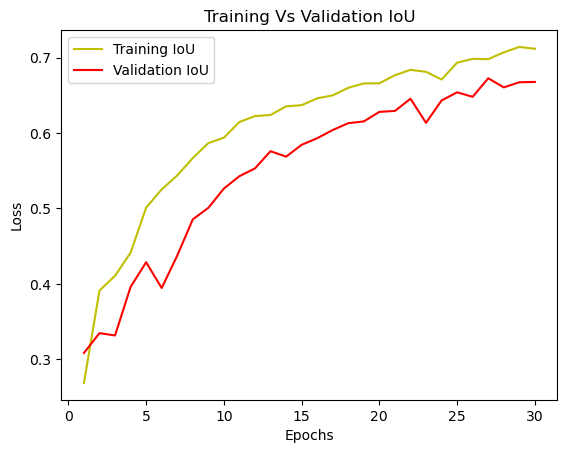

In [106]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [107]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 51}

In [108]:
y_pred = model.predict(X_test)

5/5 [==============================] - 6s 1s/step


In [109]:
len(y_pred)
y_pred

array([[[[5.60255768e-03, 6.91073835e-01, 9.30609629e-02,
          1.21358573e-01, 8.61764252e-02, 2.72763683e-03],
         [2.01200671e-03, 7.82290161e-01, 7.70762190e-02,
          9.63711441e-02, 4.17425931e-02, 5.07916033e-04],
         [2.39503733e-03, 7.18518496e-01, 1.14696927e-01,
          1.29374817e-01, 3.42025720e-02, 8.12044251e-04],
         ...,
         [1.82994343e-02, 4.52515036e-01, 2.58795530e-01,
          1.00206740e-01, 1.68439582e-01, 1.74358452e-03],
         [3.16441022e-02, 4.57132101e-01, 2.63537019e-01,
          9.93094221e-02, 1.45619705e-01, 2.75763893e-03],
         [7.36314282e-02, 3.72103751e-01, 2.20029011e-01,
          1.52067602e-01, 1.67422459e-01, 1.47457421e-02]],

        [[1.16852915e-03, 7.86152422e-01, 5.46626560e-02,
          1.22594982e-01, 3.47814187e-02, 6.39984792e-04],
         [3.27811082e-04, 8.34938765e-01, 4.04933169e-02,
          1.01038381e-01, 2.31119450e-02, 8.98120925e-05],
         [9.17178986e-04, 6.94335759e-01, 1.1068

In [110]:
y_pred_argmax = np.argmax(y_pred, axis=3)
len(y_pred_argmax)

142

In [111]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 4, 0, ..., 1, 1, 1],
        [4, 4, 4, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [112]:
y_test_argmax = np.argmax(y_test, axis=3)
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [113]:
import random
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 145ms/step


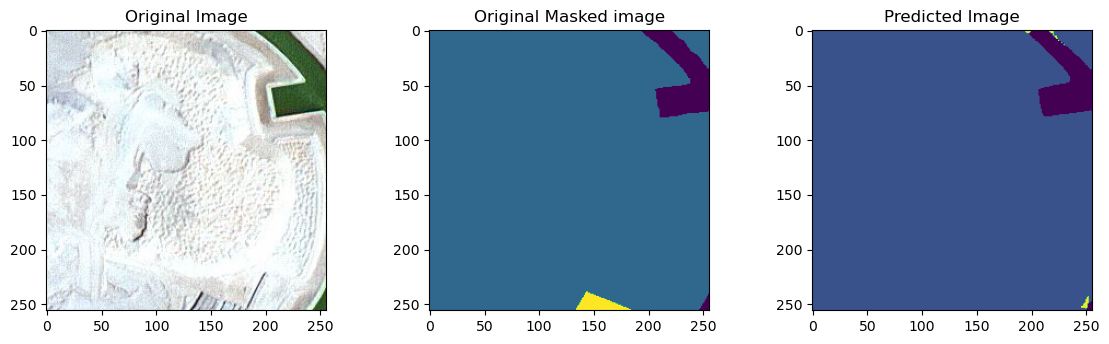

In [114]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [115]:
model.save("satellite_segmentation_full.h5")

PART 3

# Visualize Model with Keras

In [116]:
pip install pydot

In [117]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [118]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [119]:
from tensorflow.keras.utils import plot_model

In [120]:
plot_model(model, to_file="satellite_model_plot.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [121]:
import keras
from IPython.display import clear_output

%matplotlib inline

In [122]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    # self.losses.append(logs.get('loss'))
    # self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    clear_output(wait=True)
    # plt.plot(self.x, self.losses, label="loss")
    # plt.plot(self.x, self.val_losses, label="val_loss")

    plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

    plt.legend()
    plt.show();

plot_loss = PlotLoss()

In [123]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()

<Figure size 1400x800 with 0 Axes>

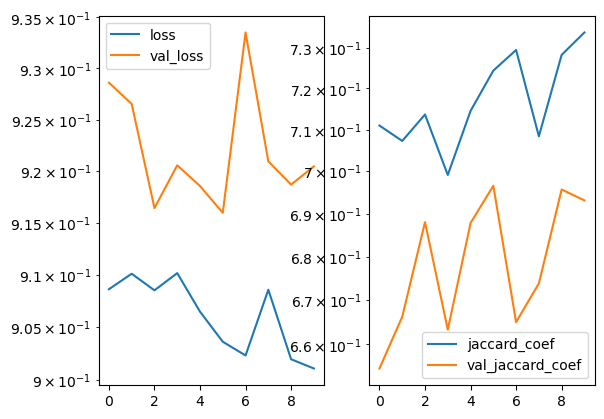

51/51 [==============================] - 190s 4s/step - loss: 0.9011 - accuracy: 0.8712 - jaccard_coef: 0.7338 - val_loss: 0.9205 - val_accuracy: 0.8371 - val_jaccard_coef: 0.6931


In [124]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          callbacks=[plot_loss],
                          shuffle=False)

<Figure size 1400x800 with 0 Axes>

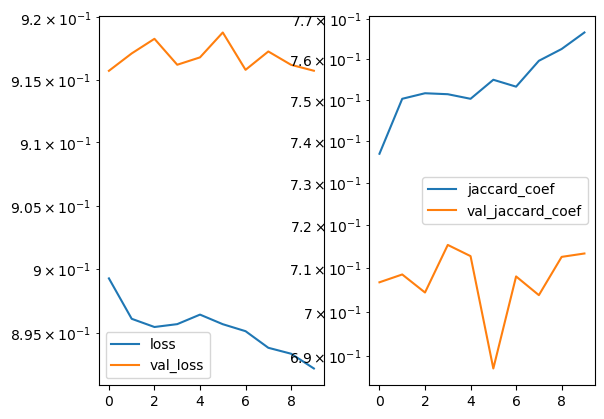

51/51 [==============================] - 189s 4s/step - loss: 0.8922 - accuracy: 0.8892 - jaccard_coef: 0.7666 - val_loss: 0.9157 - val_accuracy: 0.8482 - val_jaccard_coef: 0.7134


In [125]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          callbacks=[plot_loss],
                          shuffle=False)

In [126]:
history_a = model_history

In [127]:
history_a.history

{'loss': [0.8992610573768616,
  0.8960922360420227,
  0.8954508900642395,
  0.8956747055053711,
  0.8964204788208008,
  0.89566969871521,
  0.8951236009597778,
  0.893826425075531,
  0.8933627605438232,
  0.8922128081321716],
 'accuracy': [0.8725505471229553,
  0.8798264265060425,
  0.8807564377784729,
  0.8799954056739807,
  0.8798984885215759,
  0.8823871612548828,
  0.8813973665237427,
  0.8847041130065918,
  0.8862429261207581,
  0.8892178535461426],
 'jaccard_coef': [0.736924946308136,
  0.7502356171607971,
  0.7515901327133179,
  0.7513524293899536,
  0.75022953748703,
  0.7548948526382446,
  0.7532031536102295,
  0.7595714330673218,
  0.7624968886375427,
  0.7666064500808716],
 'val_loss': [0.915713369846344,
  0.9171042442321777,
  0.9182766079902649,
  0.9161980748176575,
  0.9167887568473816,
  0.9187843203544617,
  0.9157919883728027,
  0.9172610640525818,
  0.9161903262138367,
  0.9157190322875977],
 'val_accuracy': [0.8459485769271851,
  0.8470256924629211,
  0.84286421537

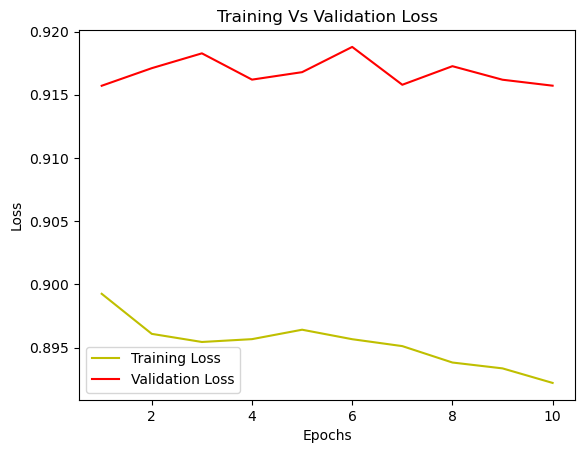

In [128]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

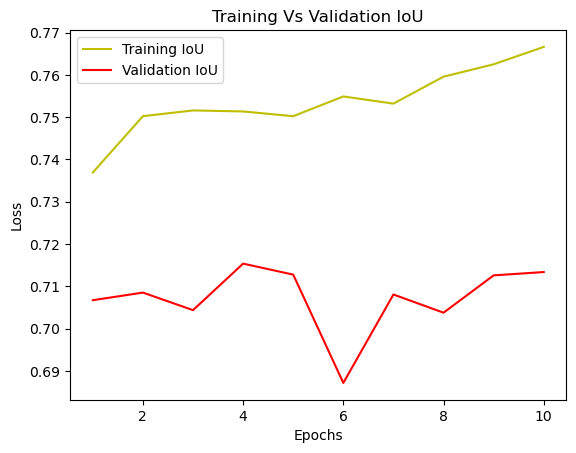

In [129]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [130]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 51}

In [131]:
y_pred = model.predict(X_test)

5/5 [==============================] - 5s 945ms/step


In [132]:
len(y_pred)

142

In [133]:
y_pred

array([[[[3.19100753e-03, 5.45297027e-01, 5.54981679e-02,
          3.04308236e-01, 9.10641700e-02, 6.41413906e-04],
         [6.22165564e-04, 5.57054281e-01, 2.71986518e-02,
          3.59720141e-01, 5.53382747e-02, 6.64898253e-05],
         [4.45683108e-04, 4.46118265e-01, 2.36644838e-02,
          4.84591872e-01, 4.51095700e-02, 7.01378958e-05],
         ...,
         [3.89117491e-03, 7.68326998e-01, 1.01233505e-01,
          8.47309381e-02, 4.17314209e-02, 8.59475695e-05],
         [7.93855637e-03, 7.35745490e-01, 1.15487784e-01,
          8.51411074e-02, 5.55334538e-02, 1.53566114e-04],
         [4.37977090e-02, 5.83051324e-01, 1.27435327e-01,
          1.56937048e-01, 8.64711776e-02, 2.30742386e-03]],

        [[6.31479779e-04, 5.11728704e-01, 2.15986110e-02,
          4.08365220e-01, 5.75863086e-02, 8.96836500e-05],
         [5.72281824e-05, 4.39129800e-01, 7.02762324e-03,
          5.00342727e-01, 5.34380525e-02, 4.52058748e-06],
         [2.98801351e-05, 2.67404556e-01, 5.8165

In [134]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [135]:
len(y_pred_argmax)

142

In [136]:
y_pred_argmax

array([[[1, 1, 3, ..., 1, 1, 1],
        [1, 3, 3, ..., 1, 1, 1],
        [1, 3, 3, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        [2, 2, 2, ..., 3, 3, 3],
        ...,
        [1, 2, 2, ..., 2, 2, 2],
        [1, 2, 2, ..., 2, 2, 2],
        [1, 1, 2, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 

In [137]:
y_test_argmax = np.argmax(y_test, axis=3)

In [138]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [142]:
import random
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 79ms/step


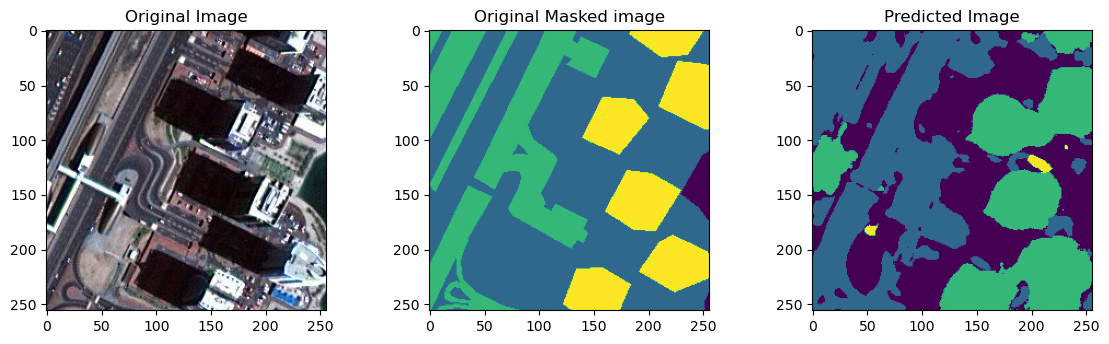

In [143]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [141]:
model.save("satellite_segmentation_full.h5")